## 作業
在鐵達尼資料集中，   
可以用今天範例中提到的三種辨識異常值的方法，  
以 training data 為資料集。  
1.觀察票價是否有異常值的現象?  
2.你覺得找出的異常是真的異常? 你覺得需要做處理嗎?  
(試著講出自己的想法。)  


### 資料
鐵達尼號 train 資料集


In [46]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [47]:
df_train = pd.read_csv("Titanic_train.csv")

### 探索性分析:
*  觀察-是否有異常值  
我們來觀察一下 Fare 變數吧!!

## Q1:觀察票價是否有異常值的現象?

## 方法1
* 進行一個描述性的統計（規定範圍），從而檢視哪些值是不合理的（範圍以外的值）。  


In [48]:
print(df_train['Age'].describe())
print('最小和最大值都在人的壽命合理範圍')

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
最小和最大值都在人的壽命合理範圍


## 方法 2
* 進行3倍標準差原則的計算，從而檢視哪些值是可疑的異常值。  


In [49]:

def outliers_z_score(data,times):
    mean_data=np.mean(data)
    std_data=np.std(data)
    ucl=mean_data+times*std_data
    lcl=mean_data-times*std_data
    return np.where((data>ucl)|(data<lcl))
    # z_score=[(i-mean_data)/std_data for i in data]
    # return np.where(np.abs(z_score)>times)
outlier_index=outliers_z_score(df_train['Age'],3)
print('離群值＝')
print(df_train.loc[outlier_index[0],'Age'])

離群值＝
630    80.0
851    74.0
Name: Age, dtype: float64


## 方法3-盒鬚圖判別法(IQR method)

離群值＝
index, Age
33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


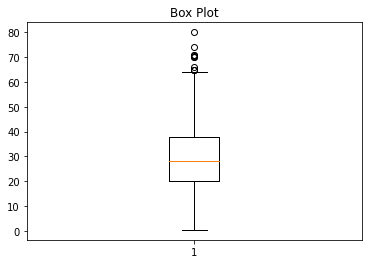

In [55]:
def outliers_iqr(data,times):
    q1,q3=np.nanpercentile(data,[25,75])
    iqr=q3-q1
    ucl=q3+times*iqr
    lcl=q1-times*iqr
    return np.where((data>ucl)|(data<lcl))

outlier_index2=outliers_iqr(df_train['Age'],1.5)
print('離群值＝')
print('index, Age')
print(df_train.loc[outlier_index2[0],'Age'])

plt.boxplot(df_train['Age'][~np.isnan(df_train['Age'])],whis=1.5)    #作圖
plt.title('Box Plot')
plt.show()

## Q2:你覺得找出的異常是真的異常? 你覺得需要做處理嗎?


In [51]:
print('若以年齡來看，不需要，因為沒有超出人類正常年齡範圍，用boxplot只是用相較嚴格的方式看待年齡資料，說明的是大部分的年齡會在66和74間')

若以年齡來看，不需要，因為沒有超出人類正常年齡範圍，用boxplot只是用相較嚴格的方式看待年齡資料，說明的是大部分的年齡會在66和74間
